<a href="https://colab.research.google.com/github/bayanbayrakdar/unsupervise-learning-project/blob/main/denoising_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

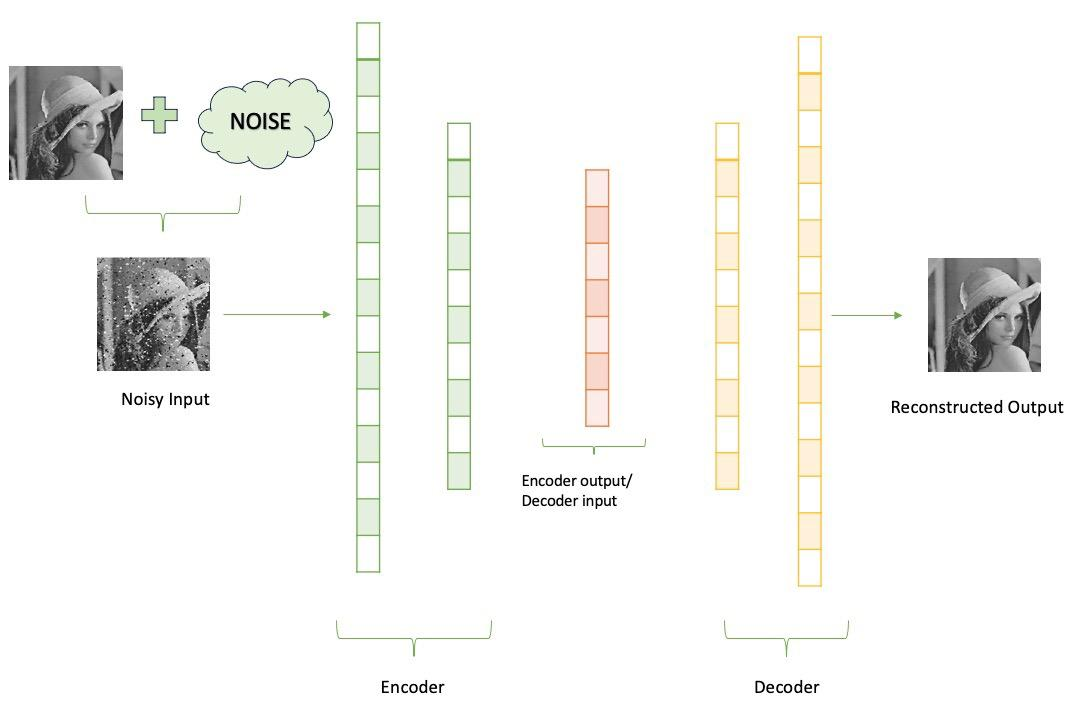

1. Import Libraries

    torch. utils.data provides tools for working with datasets and data loaders in PyTorch.

    torch-vision is a PyTorch library specifically designed for computer vision tasks. datasets contain popular datasets (like MNIST, CIFAR-10, etc.), and transforms provide image transformations and preprocessing functions.

    nn provides building blocks for constructing neural network architectures, and optim includes optimization algorithms (like SGD, Adam, etc.) for training neural networks.
    
    If a GPU is available, it sets the device variable to ‘cuda’; otherwise, it sets it to ‘CPU’

In [76]:
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
from torchvision  import transforms,datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [77]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(0,1)])
train_data=datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_data=datasets.MNIST(root='./data',train=False,download=True,transform=transform)
train_loader=DataLoader(train_data,batch_size=128,shuffle=True)
test_loader=DataLoader(test_data,batch_size=5,shuffle=True)

In [176]:
class DAE(nn.Module):
    def __init__(self):
      super().__init__()

      self.fc1 = nn.Linear(784, 512)
      self.fc2 = nn.Linear(512, 256)
      self.fc3 = nn.Linear(256, 128)

      self.fc4 = nn.Linear(128, 256)
      self.fc5 = nn.Linear(256, 512)
      self.fc6 = nn.Linear(512, 784)

      self.relu=nn.ReLU()
      self.sigmoid=nn.Sigmoid()

    def encode(self,x):
      x=self.relu(self.fc1(x))
      x=self.relu(self.fc2(x))
      x=self.relu(self.fc3(x))
      return x
    def decode(self,x):
      x=self.relu(self.fc4(x))
      x=self.relu(self.fc5(x))
      x=self.sigmoid(self.fc6(x))
      return x
    def forward(self,x):
      x=self.encode(x.view(-1, 784))
      x=self.decode(x)
      return x


In [79]:
def training(epoch,model,train_loader,loss_fn,optimizer,device):
  model.train()
  train_loss=0
  for batch,(data,_) in enumerate(train_loader):
    data=data.to(device)
    optimizer.zero_grad()

    noise=torch.randn(data.shape).to(device)
    noisy_data=data+noise

    output=model(noisy_data.to(device))
    loss=loss_fn(output,data.view(data.size(0), -1).to(device))
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()

    if batch % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch* len(data), len(train_loader.dataset),
                                                                           100. * batch /
                                                                           len(train_loader),
                                                                           loss.item()))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(train_loader.dataset)))
    save_path='n.pth'
    torch.save(model.state_dict(), save_path)
    print(f'Model saved to {save_path}')




In [80]:
model=DAE().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.MSELoss()


In [81]:
epoch=10
for epoch in range(1,epoch+1):
  training(epoch,model,train_loader,loss_fn,optimizer,device)


Streaming output truncated to the last 5000 lines.
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
Model saved to n.pth
====> Epoch: 5 Average loss: 0.0002
M

 Image 0 with label 8			  Image 1 with label 3			  Image 2 with label 9			  Image 3 with label 2			  Image 4 with label 5			 

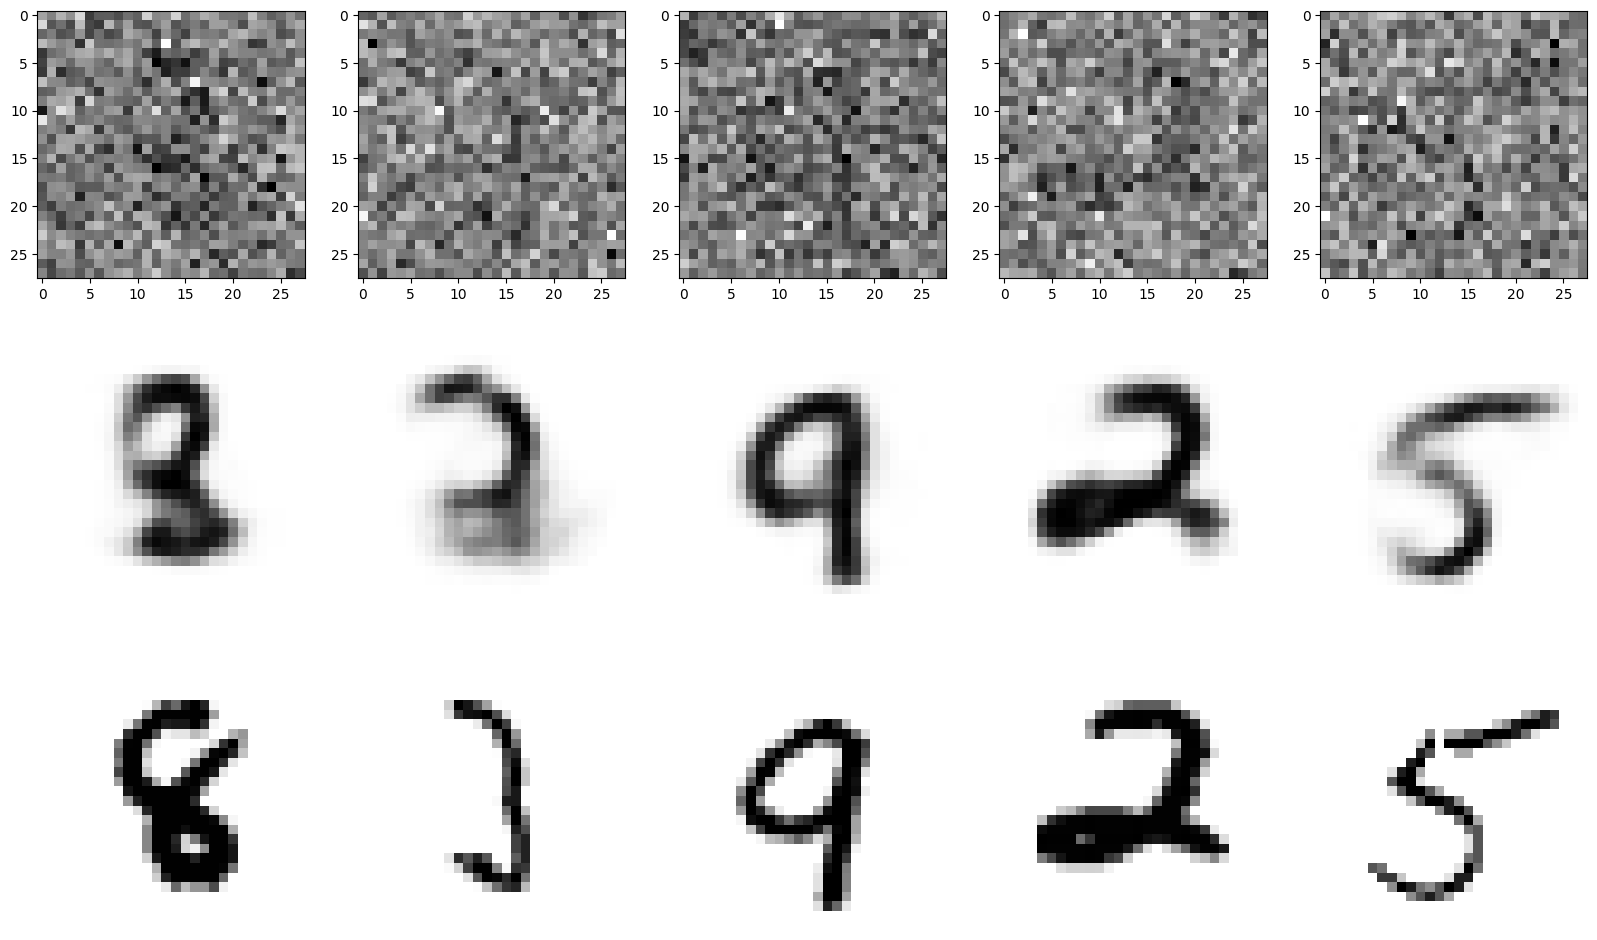

In [182]:
import matplotlib.pyplot as plt
# إعداد النموذج
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DAE().to(device)
model.load_state_dict(torch.load('n.pth'))  # تحميل أوزان النموذج
model.eval()  #
for batch_idx, (data, labels) in enumerate(test_loader):
	data.to(device)
	optimizer.zero_grad()

	data_noise = torch.randn(data.shape).to(device)
	data_noise = data + data_noise

	recon_batch = model(data_noise.to(device))
	break


plt.figure(figsize=(20, 12))
for i in range(5):

	print(f" Image {i} with label {labels[i]}			 ", end="")
	plt.subplot(3, 5, 1+i)
	plt.imshow(data_noise[i, :, :, :].view(
		28, 28).detach().numpy(), cmap='binary')
	plt.subplot(3, 5, 6+i)
	plt.imshow(recon_batch[i, :].view(28, 28).detach().numpy(), cmap='binary')
	plt.axis('off')
	plt.subplot(3, 5, 11+i)
	plt.imshow(data[i, :, :, :].view(28, 28).detach().numpy(), cmap='binary')
	plt.axis('off')
plt.show()
